# Anomaly Detection

## Importing the required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing isolation forest
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

## Loading the dataset

In [3]:
air_quality = fetch_ucirepo("Air Quality") # also we can use the id to fetch the dataset

In [4]:
# finding the format of the dataset
print(air_quality.data_format)

None


### converting the dict to the dataframe

In [5]:
# converting the dataset into pandas dataframe
df = air_quality.data.features # we can also use df = pd.DataFrame(air_quality.data.data, columns=air_quality.data.feature_names)

In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


## Data Preprocessing steps

In [7]:
df = df[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]

In [8]:
# saving the df to csv file
df.to_csv('air_quality.csv', index=False)

In [9]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [10]:
df.size

37428

In [11]:
df.shape

(9357, 4)

In [12]:
df.dtypes

CO(GT)      float64
C6H6(GT)    float64
NOx(GT)       int64
NO2(GT)       int64
dtype: object

## Parameters for isolation forest

In [13]:
n_estimator = 100 # number of trees in the forest
max_samples = 'auto' # number of samples to draw from the dataset to train each tree. If 'auto', then max_samples=min(256, n_samples)
contamination = 0.01 # the proportion of outliers in the dataset. If 'auto', the value is automatically determined as n_outliers / n_samples.
sample_size = 256 # the number of samples to draw from the dataset to train each tree. If 'auto', then max_samples=min(256, n_samples)

## Training the model

In [14]:
# training the isolation forest model
model = IsolationForest(n_estimators=n_estimator, max_samples=sample_size, contamination=contamination, random_state=42)

In [15]:
model.fit(df)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",256
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.01
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


## Anomalies Prediction

In [16]:
# predicting the anomalies
df['anomaly'] = model.predict(df) # the predict method returns 1 for normal data points and -1 for anomalies

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_42748\2532400261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = model.predict(df) # the predict method returns 1 for normal data points and -1 for anomalies


In [17]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [18]:
df.anomaly.value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

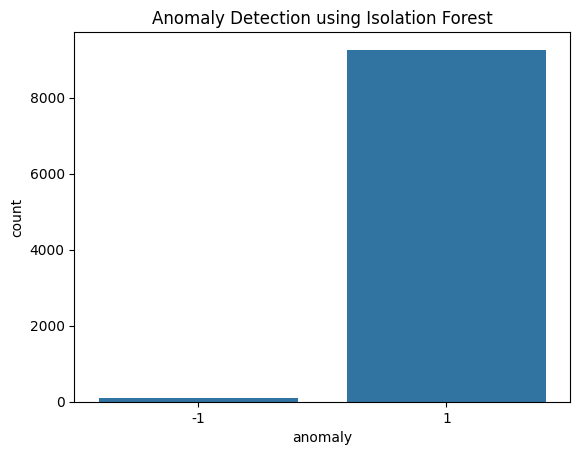

In [19]:
# what should be the threshold for anomaly detection in contaimination parameter? how to decide the threshold for anomaly detection in isolation forest?
sns.countplot(x='anomaly', data=df)
plt.title('Anomaly Detection using Isolation Forest')
plt.show()

## Visualization of the anamolies

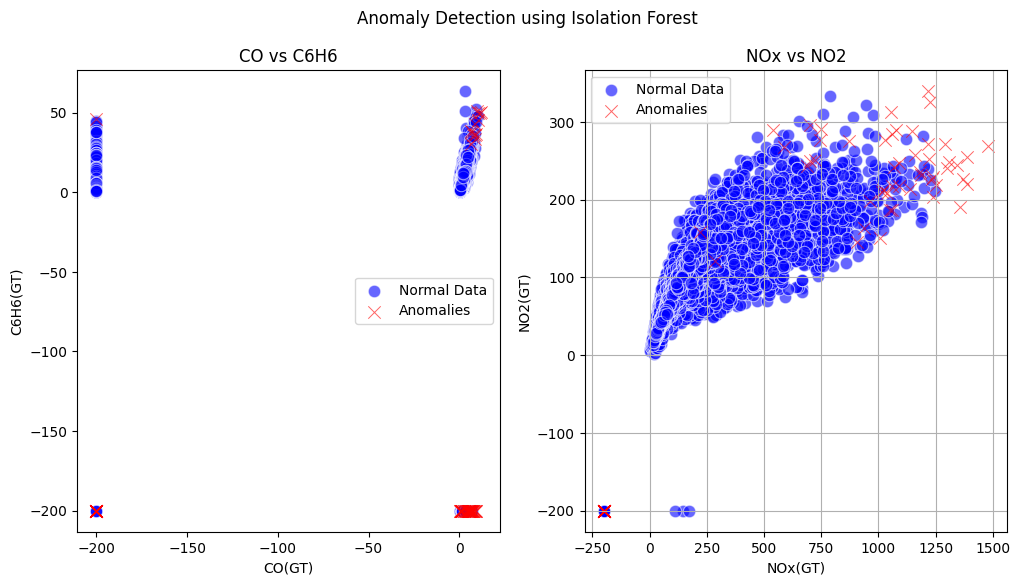

In [20]:
# visualizing the anomalies
fig, ax = plt.subplots(1,2, figsize=(12,6))

normal_data = df[df['anomaly'] == 1]
anomalies = df[df['anomaly'] == -1]

# plot 1 : CO vs C6H6
sns.scatterplot(x='CO(GT)', y='C6H6(GT)', data=normal_data, ax=ax[0], label='Normal Data', color='blue', alpha=0.6, s = 80)
sns.scatterplot(x='CO(GT)', y='C6H6(GT)', data=anomalies, ax=ax[0], label='Anomalies', color='red',marker='x', alpha=0.6, s = 80)
ax[0].set_title('CO vs C6H6')
# ax[0].legend()


# plot 2 : NOx vs NO2
sns.scatterplot(x='NOx(GT)', y='NO2(GT)', data=normal_data, ax=ax[1], label='Normal Data', color='blue', alpha=0.6, s = 80)
sns.scatterplot(x='NOx(GT)', y='NO2(GT)', data=anomalies, ax=ax[1], label='Anomalies', color='red',marker='x', alpha=0.6, s = 80)
ax[1].set_title('NOx vs NO2')
# ax[1].legend()
plt.suptitle('Anomaly Detection using Isolation Forest')
plt.grid()
plt.show()

In [21]:
# saving the model using joblib
import joblib
joblib.dump(model, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']